In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/twitter_sentiments.csv')
df.head(20)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31963 entries, 0 to 31962
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31963 non-null  int64 
 1   label   31963 non-null  int64 
 2   tweet   31963 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.3+ KB


In [ ]:
df['label'].value_counts()

0    29720
1     2243
Name: label, dtype: int64

In [ ]:
def getAnalysis(label):
  if label==0:
    return 'Positive'
  else:
    return 'Negative'
  
df['Analysis']=df['label'].apply(getAnalysis)
df

,id,label,tweet,Analysis
0,1,0,@user when a father is dysfunctional and is s...,Positive
1,2,0,@user @user thanks for #lyft credit i can't us...,Positive
2,3,0,bihday your majesty,Positive
3,4,0,#model i love u take with u all the time in ...,Positive
4,5,0,factsguide: society now #motivation,Positive
...,...,...,...,...
31958,31959,0,to see nina turner on the airwaves trying to...,Positive
31959,31960,0,listening to sad songs on a monday morning otw...,Positive
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",Negative
31961,31962,0,thank you @user for you follow,Positive


In [ ]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
df.head()

,id,label,tweet,Analysis
0,1,0,@user when a father is dysfunctional and is s...,Positive
1,2,0,@user @user thanks for #lyft credit i can't us...,Positive
2,3,0,bihday your majesty,Positive
3,4,0,#model i love u take with u all the time in ...,Positive
4,5,0,factsguide: society now #motivation,Positive


In [ ]:
# remove twitter handles (@user)
df['preprocessed_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [ ]:
df.head()

,id,label,tweet,Analysis,preprocessed_tweet
0,1,0,@user when a father is dysfunctional and is s...,Positive,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,Positive,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,Positive,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,Positive,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,Positive,factsguide: society now #motivation


In [ ]:
# remove special characters, numbers and punctuations
df['preprocessed_tweet'] = df['preprocessed_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,Analysis,preprocessed_tweet
0,1,0,@user when a father is dysfunctional and is s...,Positive,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,Positive,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,Positive,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,Positive,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,Positive,factsguide society now #motivation


In [ ]:
# remove short words
#df['preprocessed_tweet'] = df['preprocessed_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
#df.head()

In [ ]:
# individual words considered as tokens
tokenized_tweet = df['preprocessed_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can, t, use, c...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4              [factsguide, society, now, #motivation]
Name: preprocessed_tweet, dtype: object

In [ ]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, a, father, is, dysfunct, and, is, so, s...
1    [thank, for, #lyft, credit, i, can, t, use, ca...
2                              [bihday, your, majesti]
3    [#model, i, love, u, take, with, u, all, the, ...
4                    [factsguid, societi, now, #motiv]
Name: preprocessed_tweet, dtype: object

In [ ]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['preprocessed_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,Analysis,preprocessed_tweet
0,1,0,@user when a father is dysfunctional and is s...,Positive,when a father is dysfunct and is so selfish he...
1,2,0,@user @user thanks for #lyft credit i can't us...,Positive,thank for #lyft credit i can t use caus they d...
2,3,0,bihday your majesty,Positive,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,Positive,#model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,Positive,factsguid societi now #motiv


In [ ]:
#Get the percentage of positive tweets
ptweets=df[df.Analysis == 'Positive']
ptweets = ptweets['preprocessed_tweet']
round((ptweets.shape[0]/df.shape[0])*100,1)

93.0

In [ ]:
#Get the percentage of negative tweets
ptweets=df[df.Analysis == 'Negative']
ptweets = ptweets['preprocessed_tweet']
round((ptweets.shape[0]/df.shape[0])*100,1)

7.0

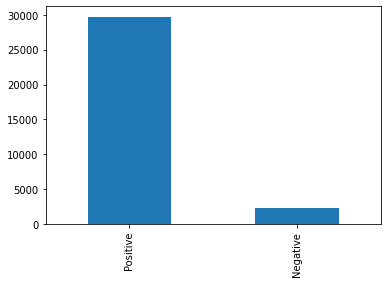

In [ ]:
df['Analysis'].value_counts().plot(kind = 'bar')

In [ ]:
# visualize the frequent words

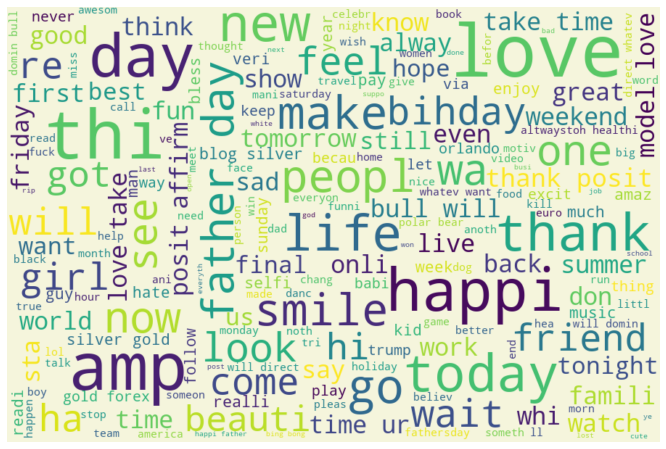

In [ ]:
all_words = " ".join([sentence for sentence in df['preprocessed_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=900, height=600, random_state=42, max_font_size=100,background_color="beige").generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# frequent words visualization for Positive

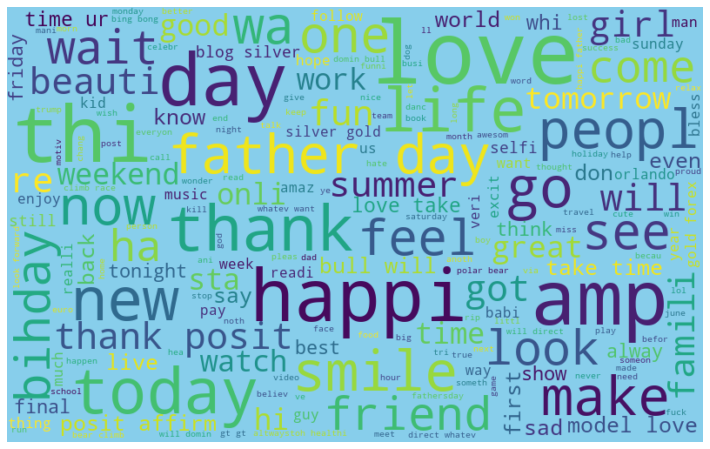

In [ ]:
all_words = " ".join([sentence for sentence in df['preprocessed_tweet'][df['Analysis']=='Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100,background_color="skyblue").generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# frequent words visualization for Negative

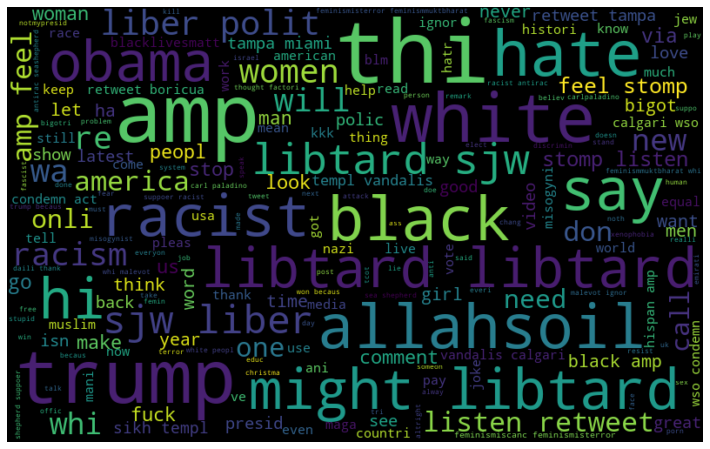

In [ ]:
all_words = " ".join([sentence for sentence in df['preprocessed_tweet'][df['Analysis']=='Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# extract the hashtag

In [ ]:
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags    

In [ ]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['preprocessed_tweet'][df['Analysis']=='Positive'])

In [ ]:

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['preprocessed_tweet'][df['Analysis']=='Negative'])

In [ ]:
ht_positive[:]

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['gr'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'ff', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 

In [ ]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [ ]:
ht_negative[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [ ]:
#combining the list

In [ ]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [ ]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [ ]:
ht_negative[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [ ]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})

d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


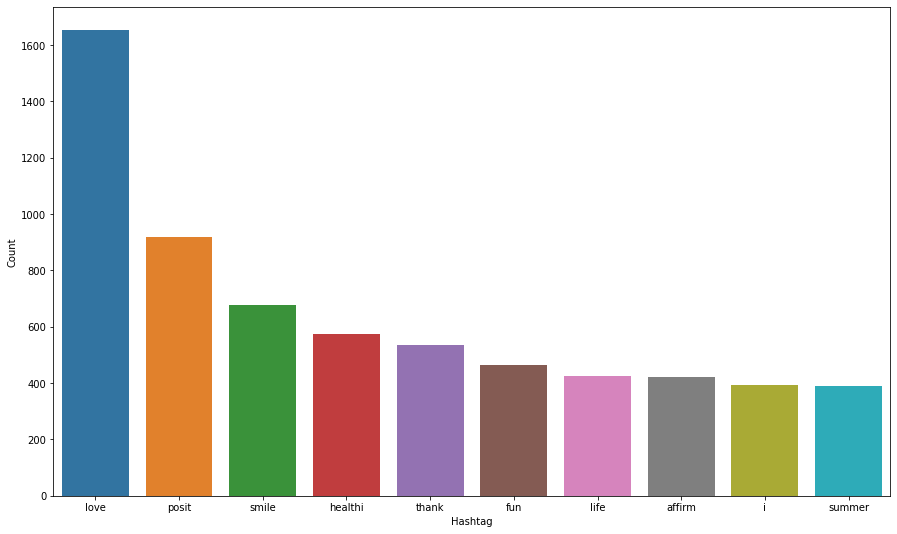

In [ ]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

Text(0, 0.5, 'Count')

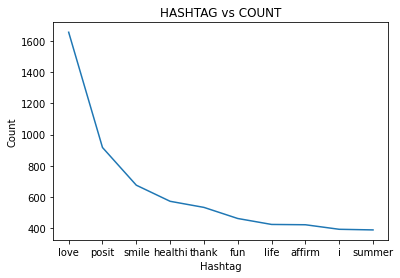

In [ ]:
import matplotlib.pyplot as plt
plt.plot(d['Hashtag'],d['Count'])#x-axis,y-axis
plt.title('HASHTAG vs COUNT')
plt.xlabel('Hashtag')
plt.ylabel('Count')

In [ ]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


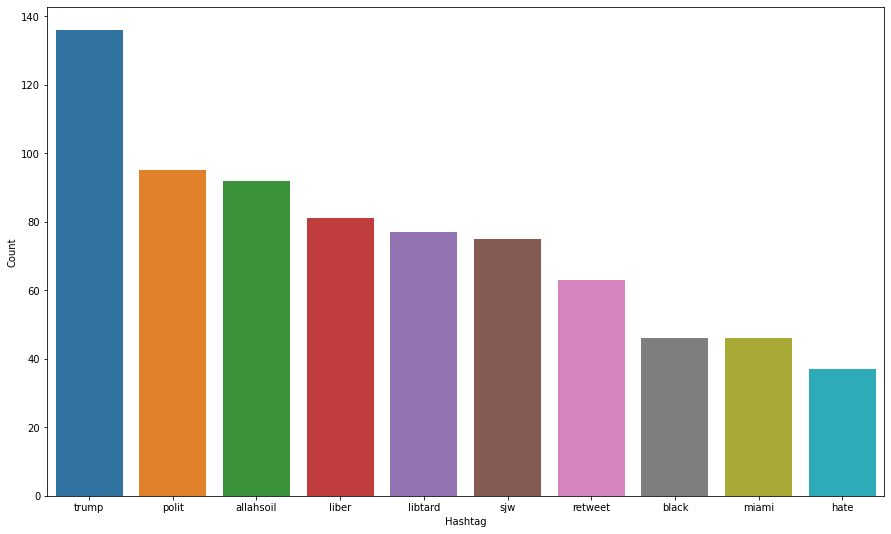

In [ ]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

Text(0, 0.5, 'Count')

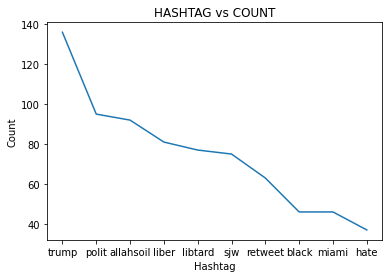

In [ ]:
import matplotlib.pyplot as plt
plt.plot(d['Hashtag'],d['Count'])#x-axis,y-axis
plt.title('HASHTAG vs COUNT')
plt.xlabel('Hashtag')
plt.ylabel('Count')

In [ ]:
#input split

In [ ]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['preprocessed_tweet'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

In [ ]:
#MODEL TRAINING

In [ ]:
#LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
model=LinearRegression()

In [ ]:
#fitting model
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#PREDICTOR VARIABLE
y_pred=model.predict(x_test)
y_pred

array([ 0.0311846 , -0.00697754,  0.20681506, ..., -0.05696094,
        0.08531807,  0.42180723])

In [ ]:
y_test

12227    0
14711    0
19320    0
4308     0
25760    0
        ..
19463    0
7363     0
31538    0
7698     0
30233    1
Name: label, Length: 7991, dtype: int64

In [ ]:
x_train[20]#10th index in x_train variable

<1x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [ ]:
#LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic= LogisticRegression(random_state=0)

In [ ]:
logistic.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
lr_prediction=logistic.predict(x_test)

In [ ]:
lr_accuracy_model = accuracy_score(y_test,lr_prediction)

In [ ]:
lr_accuracy_model

0.9461894631460392

In [ ]:
#KNN MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_prediction = knn.predict(x_test)

In [ ]:
knn_accuracy_model = accuracy_score(y_test,knn_prediction)

In [ ]:
knn_accuracy_model

0.9381804530096358

In [ ]:
#svc



In [ ]:
#Apply svm
from sklearn.svm import SVC
model=SVC()

In [ ]:
#fittimg the model
model.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=model.predict(x_test)
y_pred #predicted value

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y_test #actual value

12227    0
14711    0
19320    0
4308     0
25760    0
        ..
19463    0
7363     0
31538    0
7698     0
30233    1
Name: label, Length: 7991, dtype: int64

In [ ]:
svm_accuracy_model = accuracy_score(y_test,y_pred)

In [ ]:
svm_accuracy_model

0.948567138030284

In [ ]:
list1=[]
list1.append(lr_accuracy_model)
list1.append(knn_accuracy_model)
list1.append(svm_accuracy_model)

In [ ]:
list2 = ["Logistic Regression","KNearestNeighbours","SVC"]

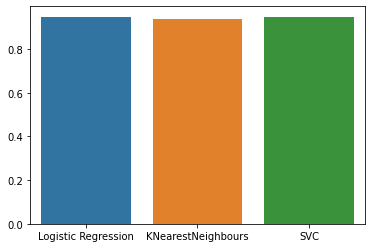

In [ ]:
import seaborn as sns
sns.barplot(list2,list1)
plt.show()

In [ ]:
#divide data into i/p and o/p
x=df['preprocessed_tweet'].values
x#When text messages are involved,we take i/p as 1 dimension

array(['when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run',
       'thank for #lyft credit i can t use caus they don t offer wheelchair van in pdx #disapoint #getthank',
       'bihday your majesti', ...,
       '#sikh #templ vandalis in in #calgari #wso condemn act',
       'thank you for you follow', 'i hate you'], dtype=object)

In [ ]:
y = df['Analysis'].values
y

array(['Positive', 'Positive', 'Positive', ..., 'Negative', 'Positive',
       'Negative'], dtype=object)

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train_v = vect.fit_transform(x_train)
x_test_v = vect.transform(x_test)

In [ ]:
#Pipeline in Sklearn - joining of TfIdf and SVC
from sklearn.pipeline import make_pipeline
text_model = make_pipeline(TfidfVectorizer(),SVC())
text_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [ ]:
#fittimg the model
model.fit(x_train_v,y_train)

SVC()

In [ ]:
y_pred=model.predict(x_test_v)
y_pred #predicted value

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [ ]:
y_test #actual value

array(['Positive', 'Positive', 'Positive', ..., 'Negative', 'Positive',
       'Positive'], dtype=object)

In [ ]:
a = df['preprocessed_tweet'][10]
a

'#ireland consum price index mom climb from previou to in may #blog #silver #gold #forex'

In [ ]:
a = vect.transform([a])
model.predict(a)

array(['Positive'], dtype=object)

In [ ]:
b = df['preprocessed_tweet'][13]
b

'#cnn call #michigan middl school build the wall chant #tcot'

In [ ]:
b = vect.transform([b])
model.predict(b)

array(['Negative'], dtype=object)

In [ ]:
#SAVING THE COMPLETE PIPELINED MODEL
#TO SAVE , WE USE MODULE/LIBRARAY - JOBLIB - DUMP,LOAD
import joblib
joblib.dump(text_model,'Twitter_sentiment_Analysis')
#using joblib.dump , we are dumping the text_model into a file spam-ham

['Twitter_sentiment_Analysis']

In [ ]:
!pip install streamlit --quiet
# ! is used to take the cell into the command prompt

In [ ]:
%%writefile app.py
#%%write is a magic command to create a .py file 
import streamlit as st
import joblib
model = joblib.load('Twitter_sentiment_Analysis')
st.title('Twitter_sentiment_CLASSIFIER')
ip = st.text_input('Enter the messaage')
op = model.predict([ip])
if st.button('Predict'):
  st.title(op[0])

Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

2022-05-25 04:33:41.512 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 6.014s
your url is: https://purple-monkeys-sort-35-234-57-49.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.234.57.49:8501

